In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Importing the dataset 

In [4]:
df=pd.read_csv("train.csv")
df

,Timestamp,Temperature,Dew Point,Surface Albedo,Pressure,Wind Direction,Wind Speed,Clearsky DHI,Clearsky DNI,Clearsky GHI,Fill Flag,Ozone,Cloud Type,Solar Zenith Angle,Precipitable Water,Relative Humidity
0,2019-01-01 00:00:00,12.5,6.9,0.21,1005,121,1.0,0,0,0,0,0.258,1,173.92,1.4,68.82
1,2019-01-01 00:10:00,12.3,6.9,0.21,1005,122,1.0,0,0,0,0,0.258,1,171.79,1.3,69.73
2,2019-01-01 00:20:00,12.1,6.9,0.21,1005,124,1.0,0,0,0,0,0.258,1,169.59,1.3,70.65
3,2019-01-01 00:30:00,12.0,6.9,0.21,1005,125,1.0,0,0,0,0,0.258,1,167.37,1.3,71.11
4,2019-01-01 00:40:00,11.8,6.9,0.21,1005,126,1.0,0,0,0,0,0.258,1,165.13,1.3,71.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210235,2022-12-31 23:10:00,6.9,5.8,0.21,1009,54,1.2,0,0,0,0,0.279,4,173.77,1.8,92.63
210236,2022-12-31 23:20:00,6.8,5.8,0.21,1009,54,1.2,0,0,0,0,0.279,7,175.77,1.8,93.26
210237,2022-12-31 23:30:00,6.8,5.8,0.21,1009,55,1.1,0,0,0,0,0.279,7,177.31,1.8,93.26
210238,2022-12-31 23:40:00,6.8,5.6,0.21,1009,55,1.1,0,0,0,0,0.279,7,177.36,1.8,91.95


# EDA

In [5]:
df.head()

,Timestamp,Temperature,Dew Point,Surface Albedo,Pressure,Wind Direction,Wind Speed,Clearsky DHI,Clearsky DNI,Clearsky GHI,Fill Flag,Ozone,Cloud Type,Solar Zenith Angle,Precipitable Water,Relative Humidity
0,2019-01-01 00:00:00,12.5,6.9,0.21,1005,121,1.0,0,0,0,0,0.258,1,173.92,1.4,68.82
1,2019-01-01 00:10:00,12.3,6.9,0.21,1005,122,1.0,0,0,0,0,0.258,1,171.79,1.3,69.73
2,2019-01-01 00:20:00,12.1,6.9,0.21,1005,124,1.0,0,0,0,0,0.258,1,169.59,1.3,70.65
3,2019-01-01 00:30:00,12.0,6.9,0.21,1005,125,1.0,0,0,0,0,0.258,1,167.37,1.3,71.11
4,2019-01-01 00:40:00,11.8,6.9,0.21,1005,126,1.0,0,0,0,0,0.258,1,165.13,1.3,71.91


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210240 entries, 0 to 210239
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Timestamp           210240 non-null  object 
 1   Temperature         210240 non-null  float64
 2   Dew Point           210240 non-null  float64
 3   Surface Albedo      210240 non-null  float64
 4   Pressure            210240 non-null  int64  
 5   Wind Direction      210240 non-null  int64  
 6   Wind Speed          210240 non-null  float64
 7   Clearsky DHI        210240 non-null  int64  
 8   Clearsky DNI        210240 non-null  int64  
 9   Clearsky GHI        210240 non-null  int64  
 10  Fill Flag           210240 non-null  int64  
 11  Ozone               210240 non-null  float64
 12  Cloud Type          210240 non-null  int64  
 13  Solar Zenith Angle  210240 non-null  float64
 14  Precipitable Water  210240 non-null  float64
 15  Relative Humidity   210240 non-nul

In [7]:
df=df.drop(['Timestamp'], axis=1)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,210240.0,26.795495,8.639162,1.000,20.800,27.30,32.200,48.900
Dew Point,210240.0,13.447805,10.234861,-12.400,4.900,13.10,24.400,29.100
Surface Albedo,210240.0,0.211623,0.020889,0.170,0.200,0.20,0.230,0.260
Pressure,210240.0,996.856141,7.226820,978.000,990.000,997.00,1003.000,1013.000
Wind Direction,210240.0,209.095453,101.616108,0.000,109.000,248.00,293.000,360.000
Wind Speed,210240.0,1.918037,1.194954,0.000,1.100,1.50,2.500,9.500
Clearsky DHI,210240.0,96.720681,120.334380,0.000,0.000,0.00,194.000,603.000
Clearsky DNI,210240.0,225.098992,277.920322,0.000,0.000,0.00,486.000,1008.000
Clearsky GHI,210240.0,249.938537,325.049751,0.000,0.000,0.00,533.000,1053.000
Fill Flag,210240.0,0.288699,1.052178,0.000,0.000,0.00,0.000,5.000


In [9]:
df.isnull().sum()

Temperature           0
Dew Point             0
Surface Albedo        0
Pressure              0
Wind Direction        0
Wind Speed            0
Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
Fill Flag             0
Ozone                 0
Cloud Type            0
Solar Zenith Angle    0
Precipitable Water    0
Relative Humidity     0
dtype: int64

In [10]:
df.duplicated().sum()

1

In [11]:
df=df.drop_duplicates()

In [12]:
df.duplicated().sum()

0

In [13]:
column = df.columns
column

Index(['Temperature', 'Dew Point', 'Surface Albedo', 'Pressure',
       'Wind Direction', 'Wind Speed', 'Clearsky DHI', 'Clearsky DNI',
       'Clearsky GHI', 'Fill Flag', 'Ozone', 'Cloud Type',
       'Solar Zenith Angle', 'Precipitable Water', 'Relative Humidity'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210239 entries, 0 to 210239
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Temperature         210239 non-null  float64
 1   Dew Point           210239 non-null  float64
 2   Surface Albedo      210239 non-null  float64
 3   Pressure            210239 non-null  int64  
 4   Wind Direction      210239 non-null  int64  
 5   Wind Speed          210239 non-null  float64
 6   Clearsky DHI        210239 non-null  int64  
 7   Clearsky DNI        210239 non-null  int64  
 8   Clearsky GHI        210239 non-null  int64  
 9   Fill Flag           210239 non-null  int64  
 10  Ozone               210239 non-null  float64
 11  Cloud Type          210239 non-null  int64  
 12  Solar Zenith Angle  210239 non-null  float64
 13  Precipitable Water  210239 non-null  float64
 14  Relative Humidity   210239 non-null  float64
dtypes: float64(8), int64(7)
memory usa

In [15]:
df['Temperature']= df['Temperature'].astype(int)
df['Dew Point']=df['Dew Point'].astype(int)
df['Surface Albedo']=df['Surface Albedo'].astype(int)
df['Wind Speed']=df['Wind Speed'].astype(int)
df['Ozone']=df['Ozone'].astype(int)
df['Solar Zenith Angle']=df['Solar Zenith Angle'].astype(int)
df['Precipitable Water']=df['Precipitable Water'].astype(int)
df['Relative Humidity']=df['Relative Humidity'].astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210239 entries, 0 to 210239
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   Temperature         210239 non-null  int32
 1   Dew Point           210239 non-null  int32
 2   Surface Albedo      210239 non-null  int32
 3   Pressure            210239 non-null  int64
 4   Wind Direction      210239 non-null  int64
 5   Wind Speed          210239 non-null  int32
 6   Clearsky DHI        210239 non-null  int64
 7   Clearsky DNI        210239 non-null  int64
 8   Clearsky GHI        210239 non-null  int64
 9   Fill Flag           210239 non-null  int64
 10  Ozone               210239 non-null  int32
 11  Cloud Type          210239 non-null  int64
 12  Solar Zenith Angle  210239 non-null  int32
 13  Precipitable Water  210239 non-null  int32
 14  Relative Humidity   210239 non-null  int32
dtypes: int32(8), int64(7)
memory usage: 19.2 MB


# Checking the Outliers and Removing it

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


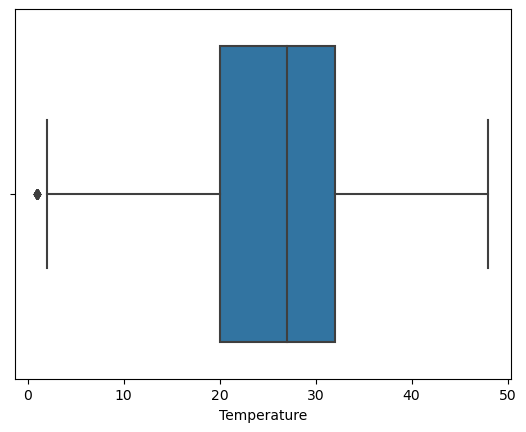

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


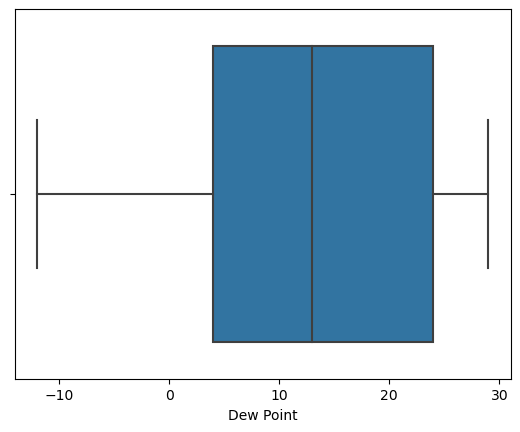

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


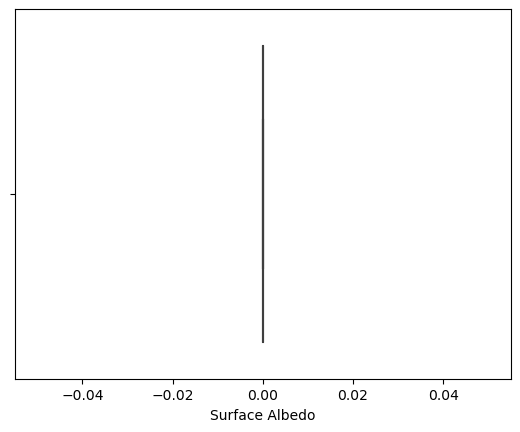

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


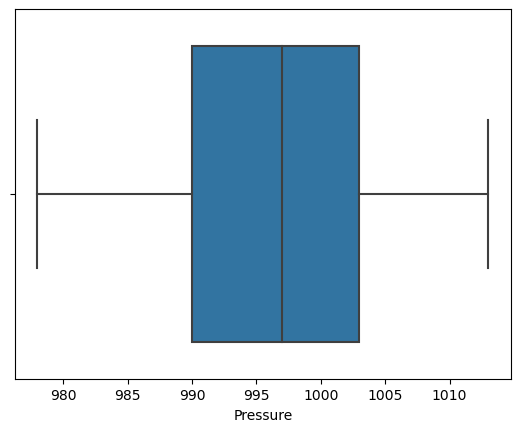

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


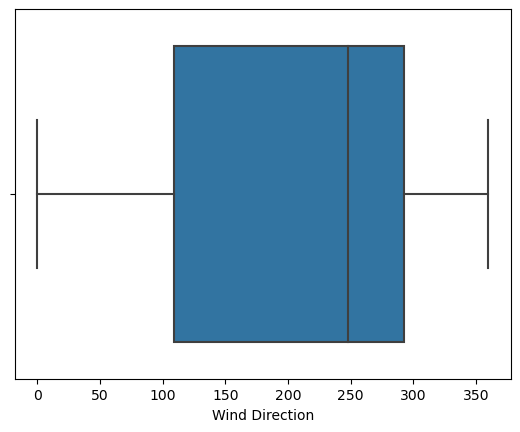

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


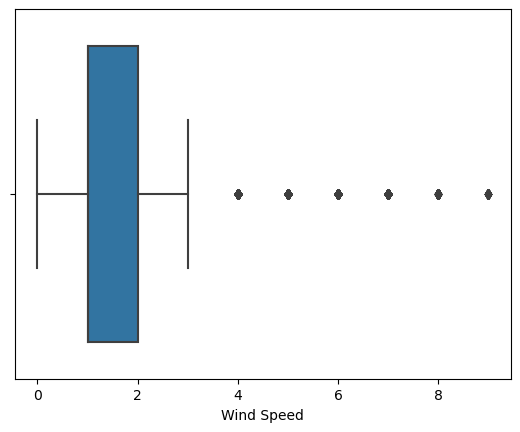

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


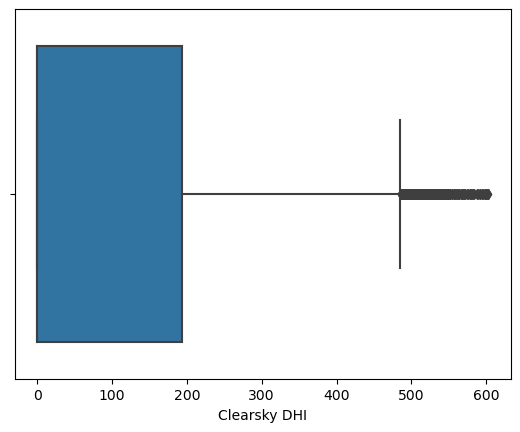

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


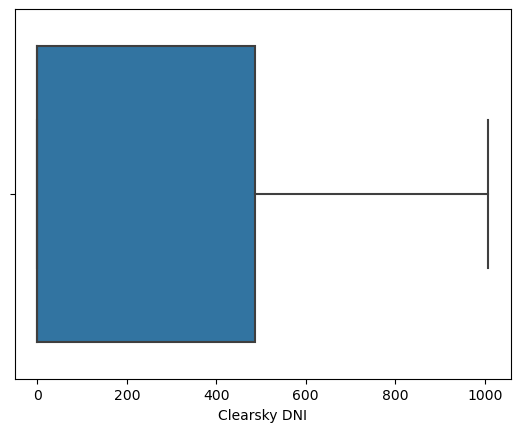

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


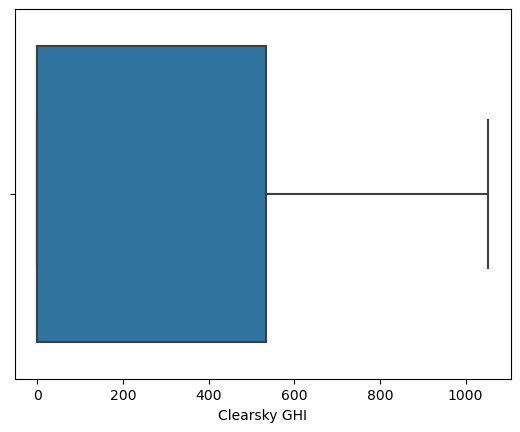

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


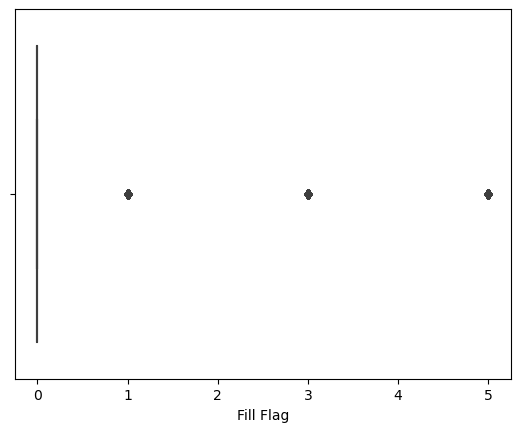

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


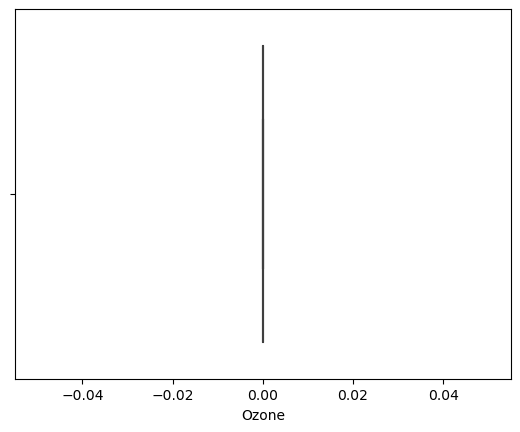

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


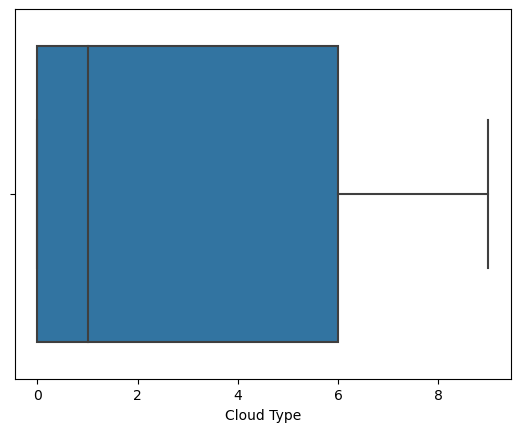

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


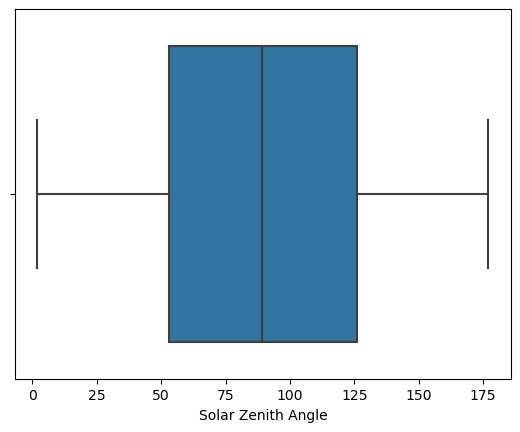

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


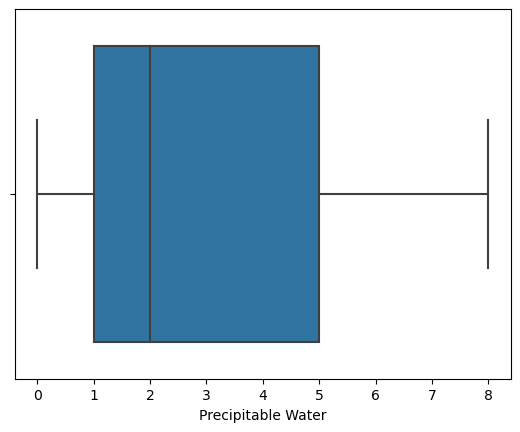

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


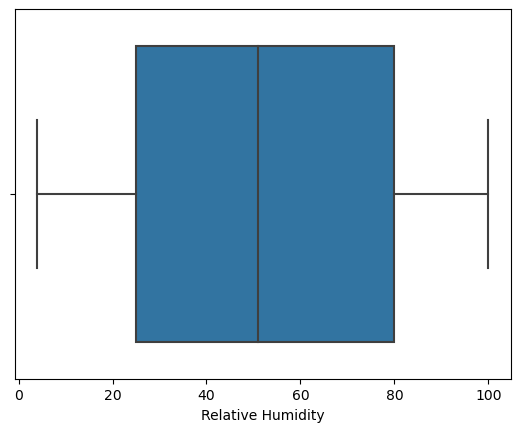

In [17]:
for col in column:
    sns.boxplot(df[col])
    plt.show()

In [18]:
for i in column:
    if df[i].dtypes in [int,float]:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        lower_fence = Q1 - 1.5* IQR
        upper_fence = Q3 + 1.5*IQR
        df = df[(df[i]>=lower_fence) & (df[i]<=upper_fence)]

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


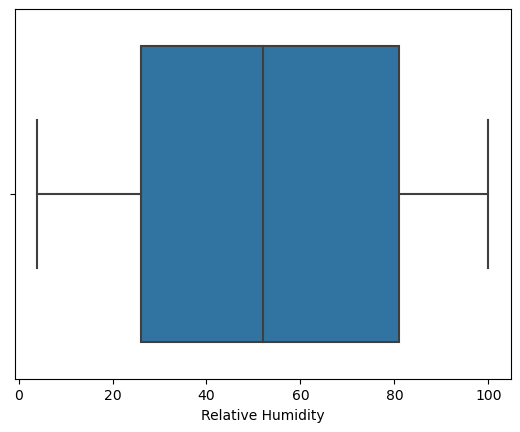

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


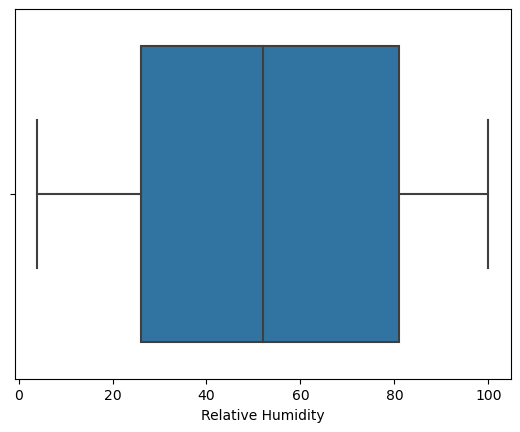

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


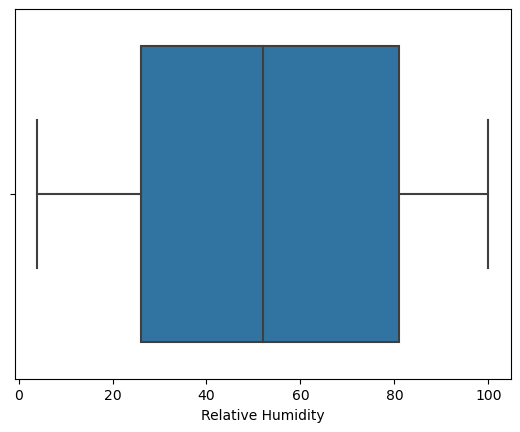

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


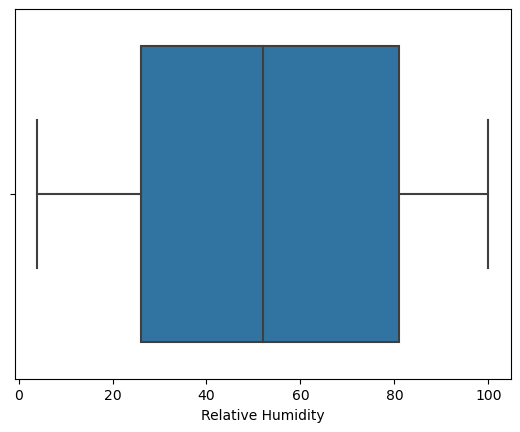

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


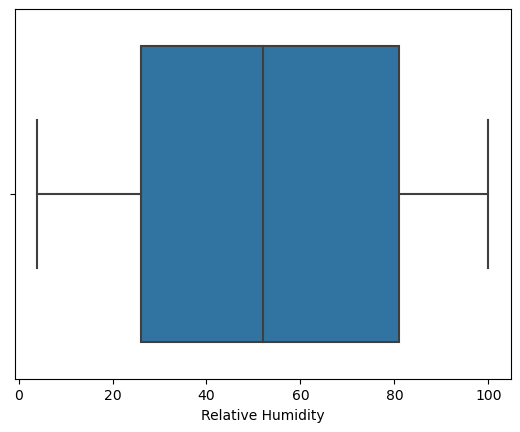

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


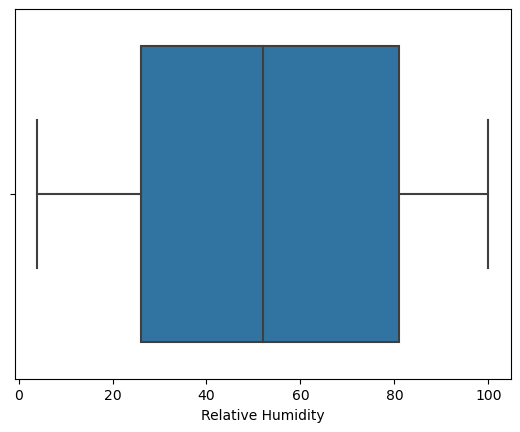

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


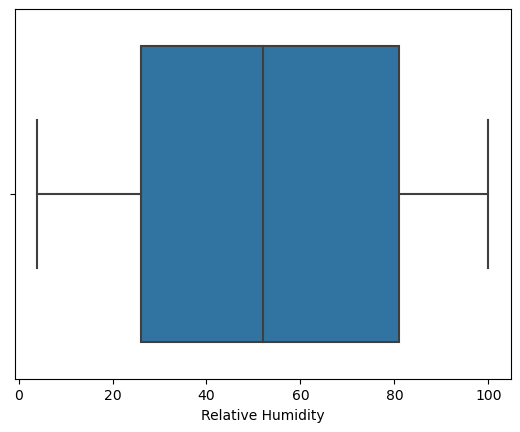

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


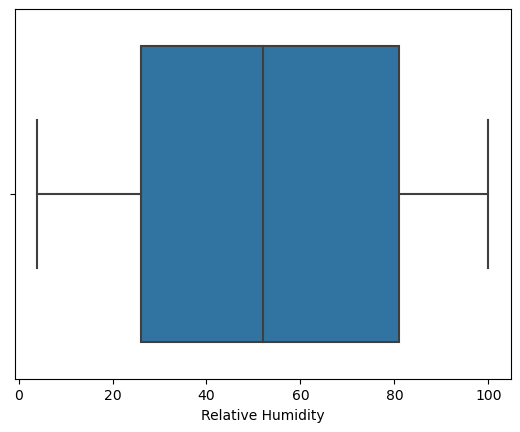

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


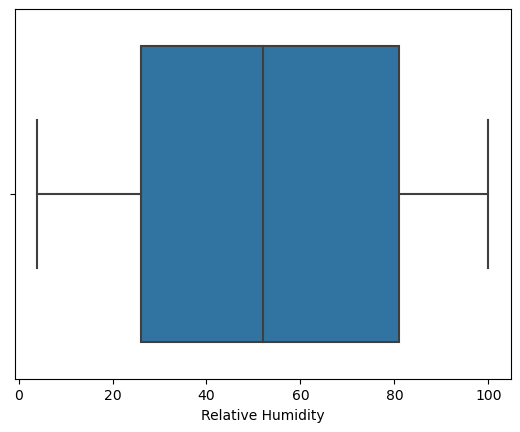

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


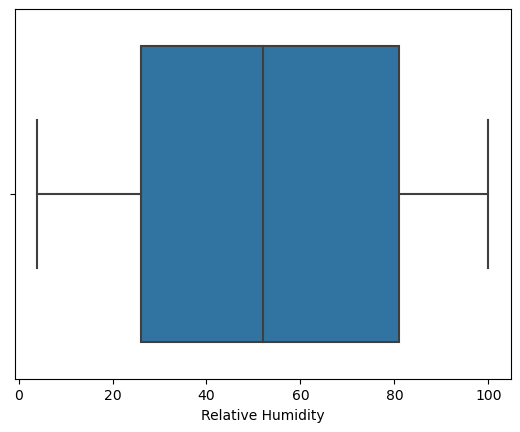

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


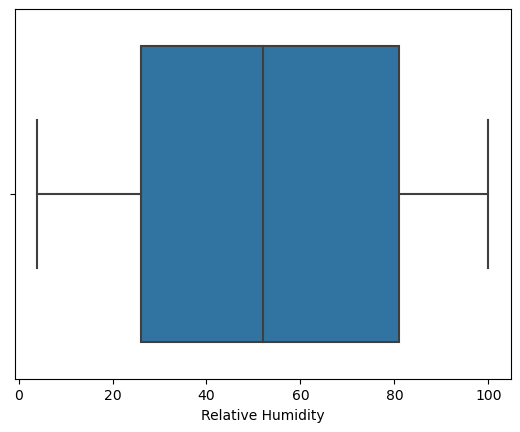

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


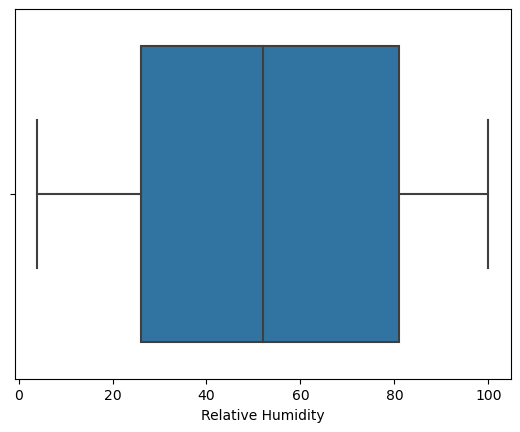

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


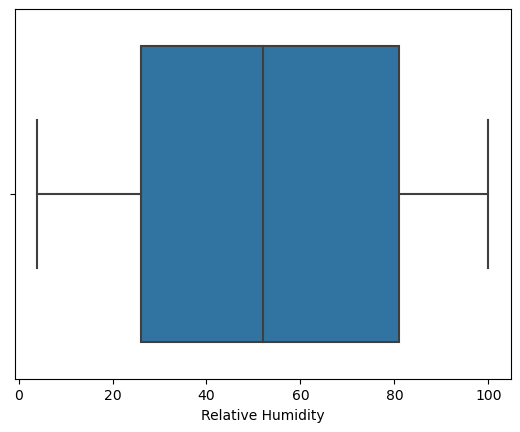

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


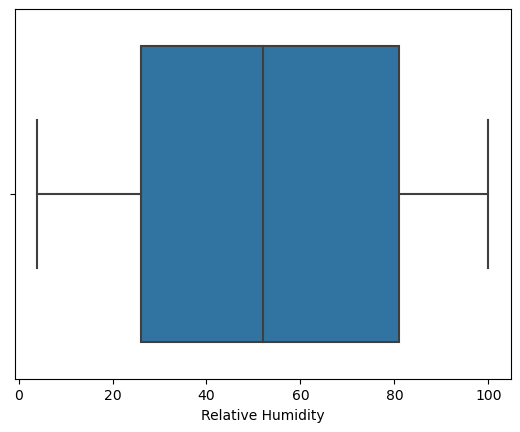

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


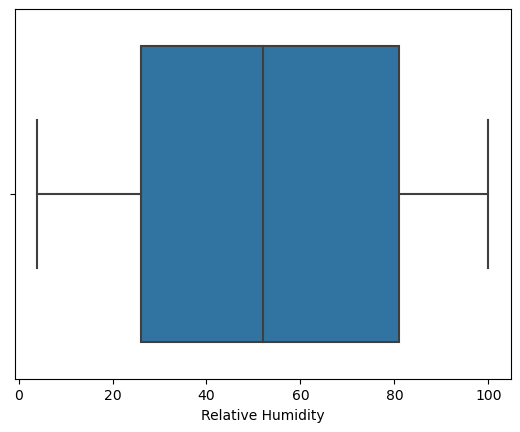

In [19]:
for col in column:
    sns.boxplot(df[i])
    plt.show()
    

# outliers removed

In [20]:
df.columns

Index(['Temperature', 'Dew Point', 'Surface Albedo', 'Pressure',
       'Wind Direction', 'Wind Speed', 'Clearsky DHI', 'Clearsky DNI',
       'Clearsky GHI', 'Fill Flag', 'Ozone', 'Cloud Type',
       'Solar Zenith Angle', 'Precipitable Water', 'Relative Humidity'],
      dtype='object')

In [21]:
# plt.figure(figsize = (10,10))
# viz = df['Clearsky DHI']
# plt.pie(viz, labels = viz.index,autopct='%1.1f%%')
# plt.title('Checking for imblanced Data on Clearsky DHI')
# plt.show()

In [22]:
# plt.figure(figsize = (10,10))
# viz = df['Clearsky DNI']
# plt.pie(viz, labels = viz.index,autopct='%1.1f%%')
# plt.title('Checking for imblanced Data on Clearsky DHI')
# plt.show()

In [23]:
# plt.figure(figsize = (10,10))
# viz = df['Clearsky GHI']
# plt.pie(viz, labels = viz.index,autopct='%1.1f%%')
# plt.title('Checking for imblanced Data on Clearsky DHI')
# plt.show()

In [24]:
df['Clearsky DHI'].value_counts()

0      103175
173       399
179       396
253       386
190       386
        ...  
564         1
561         1
549         1
520         1
538         1
Name: Clearsky DHI, Length: 557, dtype: int64

In [25]:
df.corr()

,Temperature,Dew Point,Surface Albedo,Pressure,Wind Direction,Wind Speed,Clearsky DHI,Clearsky DNI,Clearsky GHI,Fill Flag,Ozone,Cloud Type,Solar Zenith Angle,Precipitable Water,Relative Humidity
Temperature,1.000000,0.329058,NaN,-0.717576,-0.079876,0.302204,0.496170,0.444507,0.510995,0.106425,NaN,0.145712,-0.538197,0.441344,-0.319152
Dew Point,0.329058,1.000000,NaN,-0.603857,-0.270852,0.018083,0.052239,0.030228,0.067571,0.144715,NaN,0.537058,-0.119520,0.879401,0.754154
Surface Albedo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure,-0.717576,-0.603857,NaN,1.000000,0.198354,-0.216057,-0.057279,-0.025525,-0.084088,-0.125281,NaN,-0.434668,0.156582,-0.746027,-0.131159
Wind Direction,-0.079876,-0.270852,NaN,0.198354,1.000000,0.064974,0.087910,0.097128,0.080685,-0.067516,NaN,-0.211808,-0.081341,-0.284588,-0.188603
Wind Speed,0.302204,0.018083,NaN,-0.216057,0.064974,1.000000,0.346308,0.398952,0.386921,0.049752,NaN,0.042400,-0.382231,0.114209,-0.177526
Clearsky DHI,0.496170,0.052239,NaN,-0.057279,0.087910,0.346308,1.000000,0.833079,0.921755,0.097876,NaN,-0.047171,-0.858518,0.068306,-0.289481
Clearsky DNI,0.444507,0.030228,NaN,-0.025525,0.097128,0.398952,0.833079,1.000000,0.949415,0.042107,NaN,-0.045684,-0.857890,0.070323,-0.264230
Clearsky GHI,0.510995,0.067571,NaN,-0.084088,0.080685,0.386921,0.921755,0.949415,1.000000,0.029477,NaN,-0.026220,-0.876865,0.107101,-0.273577
Fill Flag,0.106425,0.144715,NaN,-0.125281,-0.067516,0.049752,0.097876,0.042107,0.029477,1.000000,NaN,0.274734,-0.143157,0.169303,0.065293


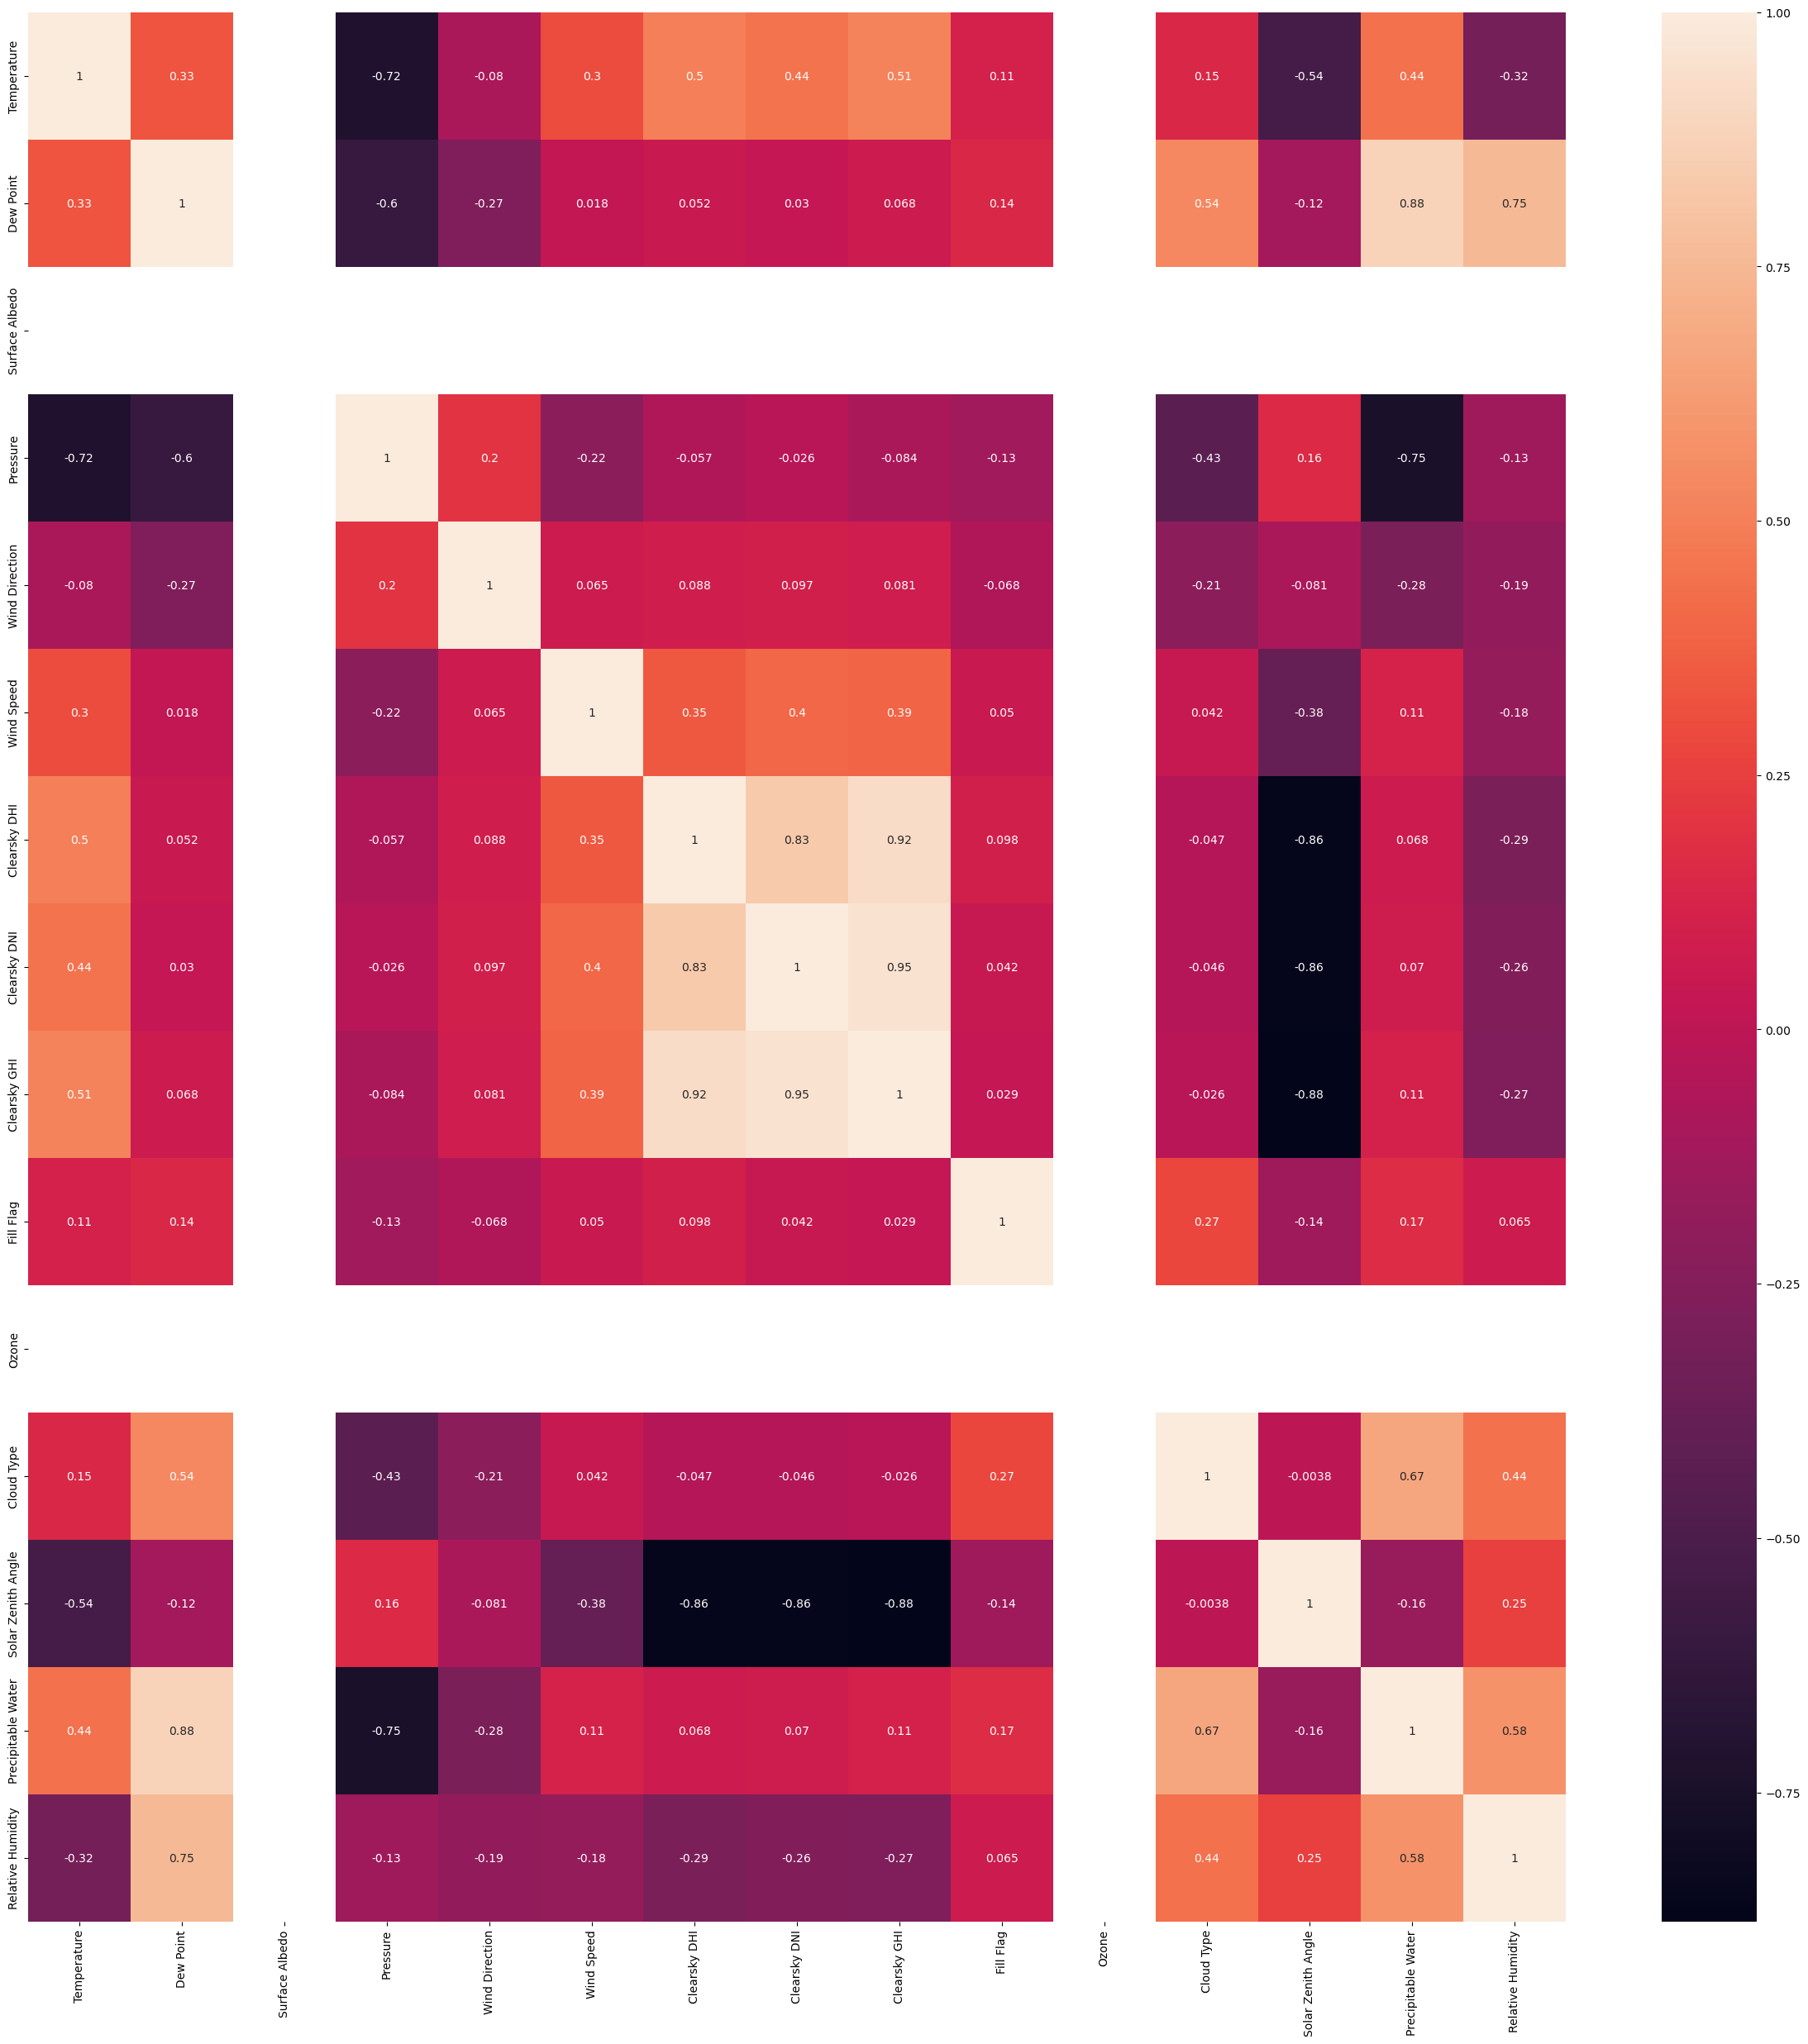

In [27]:
fig = plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Splitting the data into x and y

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194588 entries, 0 to 210239
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   Temperature         194588 non-null  int32
 1   Dew Point           194588 non-null  int32
 2   Surface Albedo      194588 non-null  int32
 3   Pressure            194588 non-null  int64
 4   Wind Direction      194588 non-null  int64
 5   Wind Speed          194588 non-null  int32
 6   Clearsky DHI        194588 non-null  int64
 7   Clearsky DNI        194588 non-null  int64
 8   Clearsky GHI        194588 non-null  int64
 9   Fill Flag           194588 non-null  int64
 10  Ozone               194588 non-null  int32
 11  Cloud Type          194588 non-null  int64
 12  Solar Zenith Angle  194588 non-null  int32
 13  Precipitable Water  194588 non-null  int32
 14  Relative Humidity   194588 non-null  int32
dtypes: int32(8), int64(7)
memory usage: 17.8 MB


In [39]:
x=df.pop(df.columns==('Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI'))
x

ValueError: Item wrong length 14 instead of 194588.

# Checking for the colarinity ( Feature Selection)

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
col_list = []
for i in df.columns:
    if(i!= 'Salary'):
        col_list = np.append(col_list,i)  
        


x= df[col_list]
vif = pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif       


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,Features,VIF
0,Temperature,76.951003
1,Dew Point,46.315170
2,Surface Albedo,NaN
3,Pressure,159.603948
4,Wind Direction,5.825835
5,Wind Speed,3.734314
6,Clearsky DHI,14.845777
7,Clearsky DNI,21.675246
8,Clearsky GHI,39.691120
9,Fill Flag,1.279931


In [34]:
df=df.drop('Pressure', axis=1)

In [35]:
col_list = []
for i in df.columns:
    if(i!= 'Salary'):
        col_list = np.append(col_list,i)  
        


x= df[col_list]
vif = pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif  

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,Features,VIF
0,Temperature,30.984414
1,Dew Point,32.393211
2,Surface Albedo,NaN
3,Wind Direction,5.701998
4,Wind Speed,3.707642
5,Clearsky DHI,13.754951
6,Clearsky DNI,20.482038
7,Clearsky GHI,39.280853
8,Fill Flag,1.271726
9,Ozone,NaN
